# Iris Flower Classification

Iris flower has three species: setosa, versicolor, and virginica, which differs according to their measurements.
Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

# Data:
Kaggle: https://www.kaggle.com/datasets/saurabh00007/iriscsv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from warnings import filterwarnings
filterwarnings(action='ignore')

# Data Exploration 

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# DataFrame of column name with number of null values present
total = df.isnull().sum().sort_values()
percent = total / df.isnull().count().sort_values()
pd.concat([total,percent],axis = 1,keys = ['Count','%'])

,Count,%
Id,0,0.0
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0
Species,0,0.0


We can see there is no null value in our dataset.

We will drop the columns which are of no use. That is the Id column.

In [7]:
df = df.drop(["Id"], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.duplicated().sum()

3

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df["Species"].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

# Data Visualization

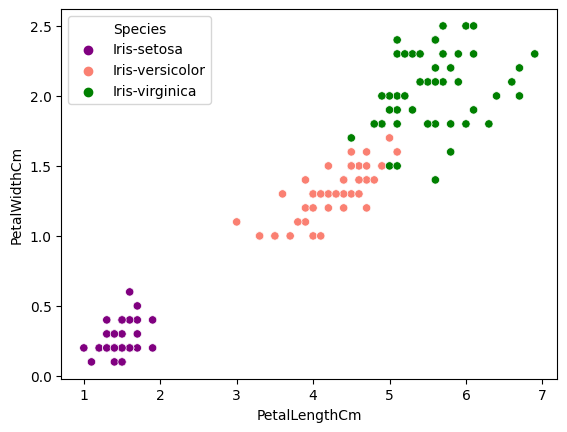

In [12]:
sns.scatterplot(x=df["PetalLengthCm"],y=df["PetalWidthCm"],hue=df['Species'],palette=["purple","salmon","green"]);

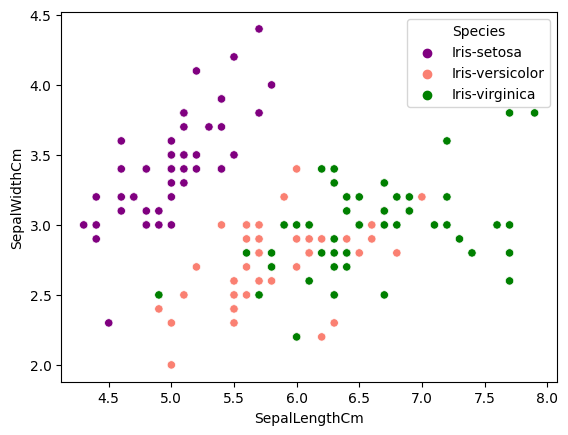

In [13]:
sns.scatterplot(x=df["SepalLengthCm"],y=df["SepalWidthCm"],hue=df['Species'],palette=["purple","salmon","green"]);

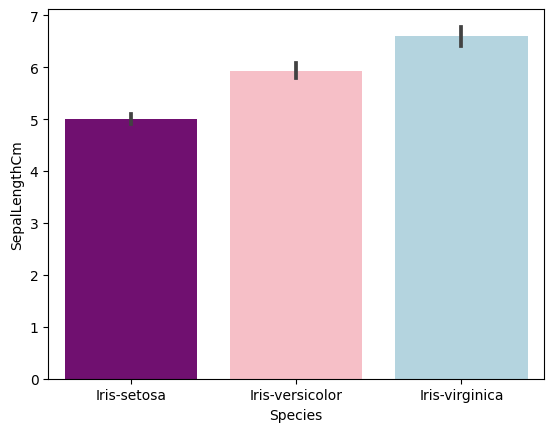

In [14]:
sns.barplot(x=df["Species"],y=df['SepalLengthCm'],palette=["purple","lightpink","lightblue"]);

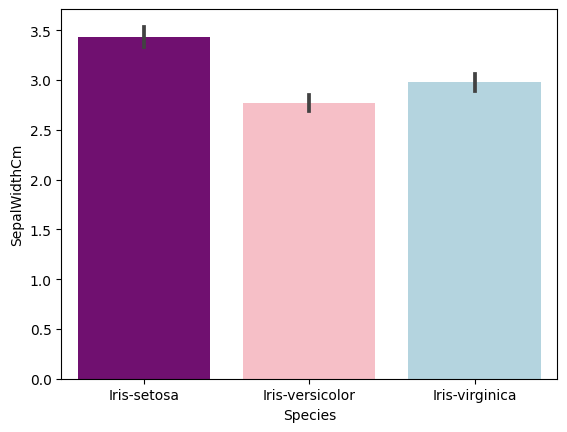

In [15]:
sns.barplot(x=df["Species"],y=df['SepalWidthCm'],palette=["purple","lightpink","lightblue"]);

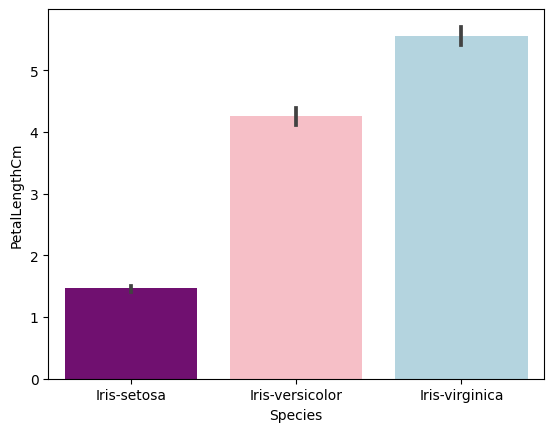

In [16]:
sns.barplot(x=df["Species"],y=df['PetalLengthCm'],palette=["purple","lightpink","lightblue"]);

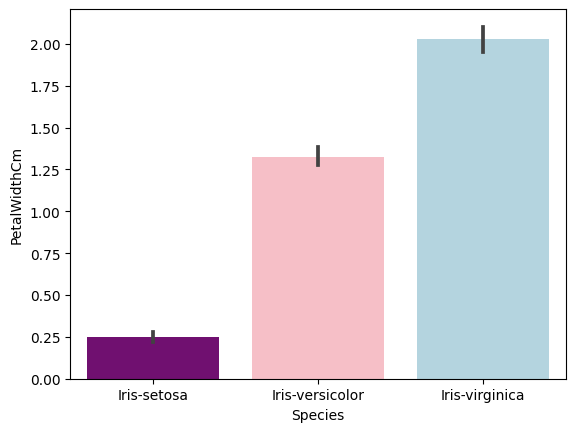

In [17]:
sns.barplot(x=df["Species"],y=df['PetalWidthCm'],palette=["purple","lightpink","lightblue"]);

In [18]:
n = len(df[df['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [19]:
n1 = len(df[df['Species'] == 'Iris-virginica'])
print("No of virginica in Dataset:",n1)

No of virginica in Dataset: 49


In [20]:
n2 = len(df[df['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 48


In [21]:
print(len(df["Species"]))

147


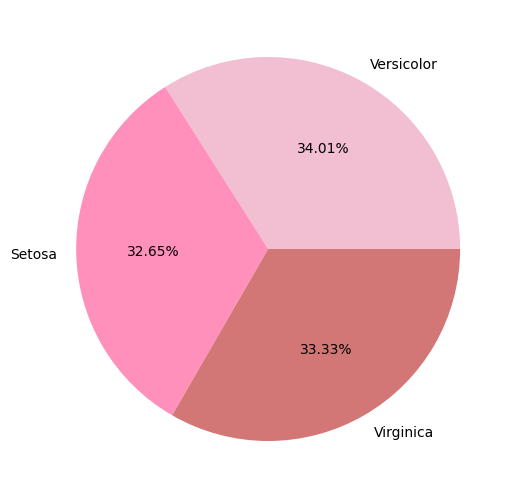

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis()
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,48,49]
ax.pie(s, labels = l,autopct='%1.2f%%',colors=['#F2BED1', '#FF90BC', '#D37676'])
plt.show()

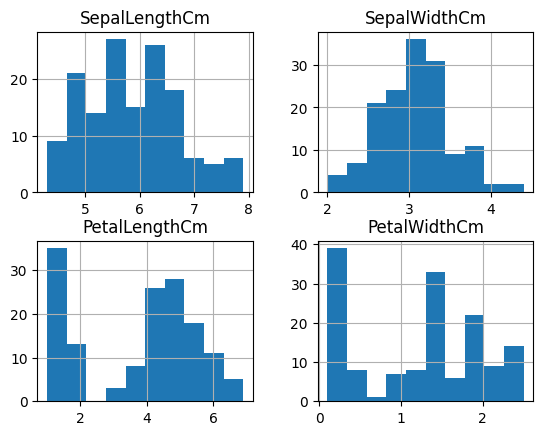

In [23]:
df.hist();

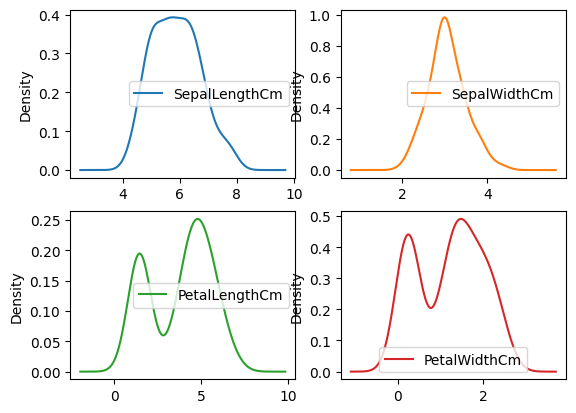

In [24]:
df.plot(kind ='density',subplots = True, layout =(2,2),sharex = False);

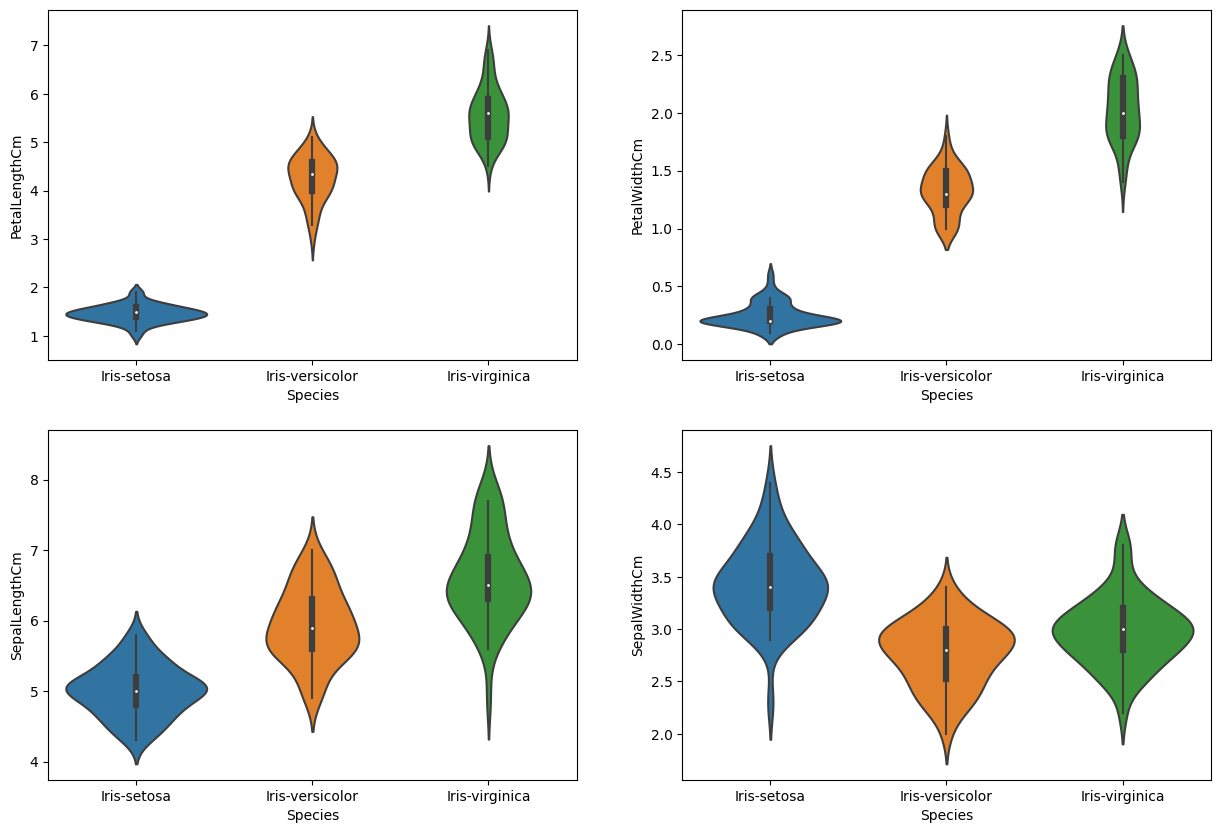

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df);
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df);
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df);
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df);

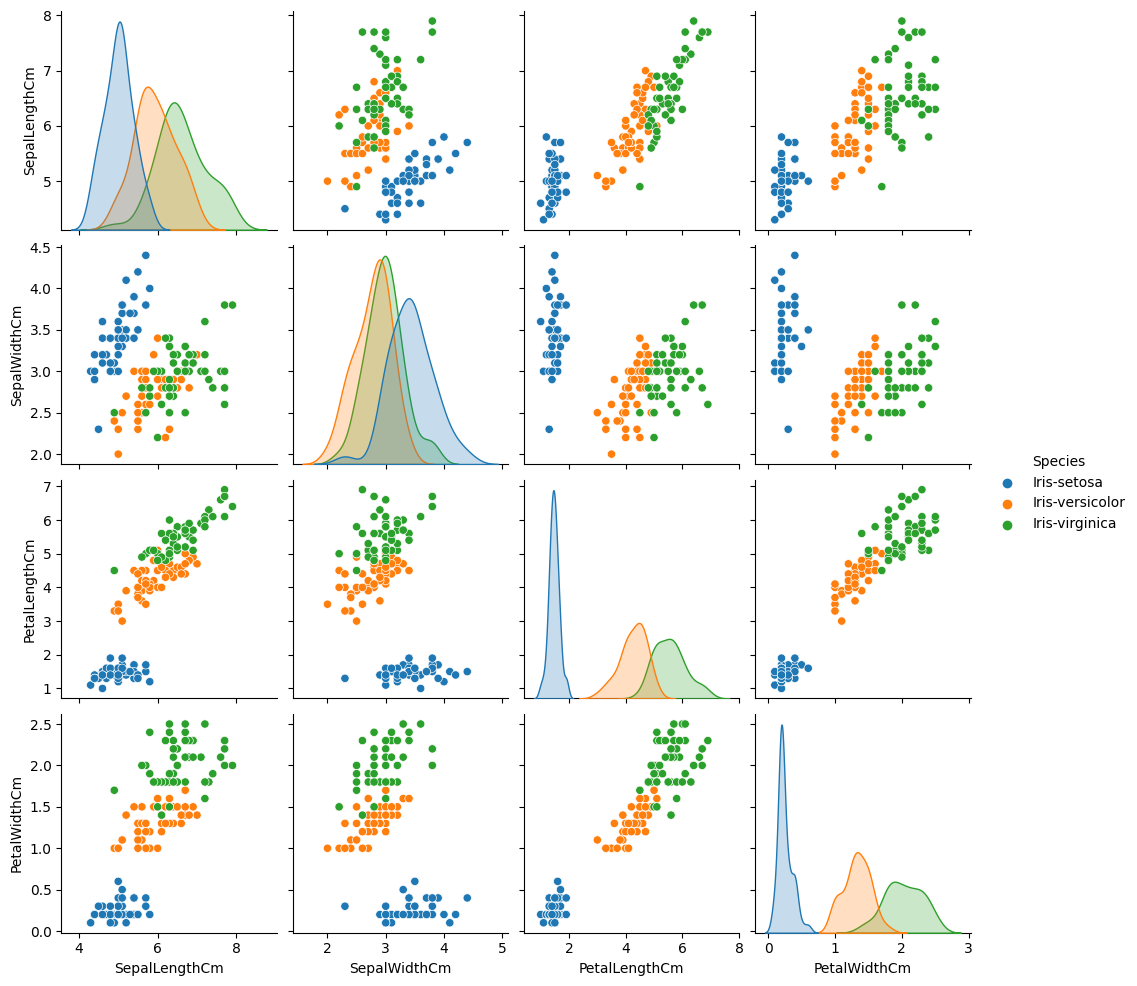

In [26]:
sns.pairplot(df,hue='Species');

# Data Preprocessing

In [27]:
#Features
X = df.drop('Species', axis=1)  # Features
y = df['Species']  # Target

In [28]:
# Encode the target labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

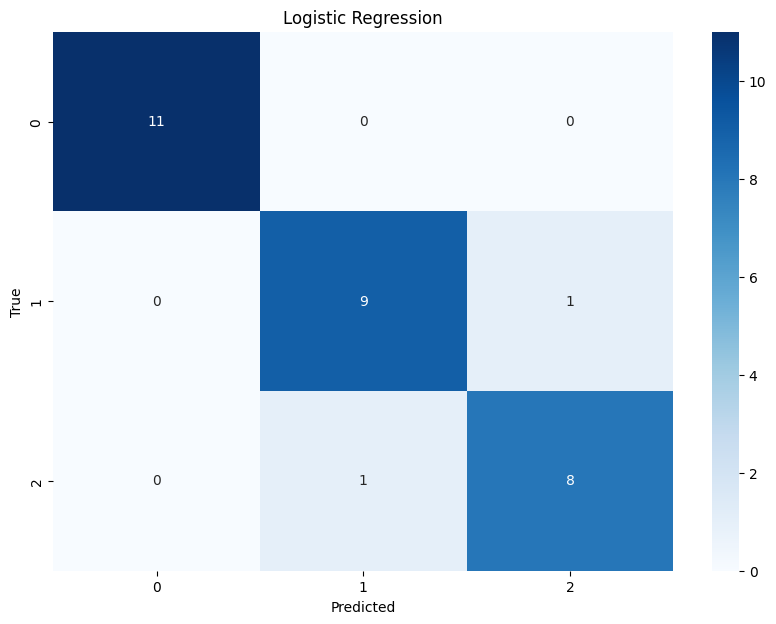

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Accuracy for Logistic Regression: 93.33%

Precision for class 0: 1.00
Precision for class 1: 0.90
Precision for class 2: 0.89


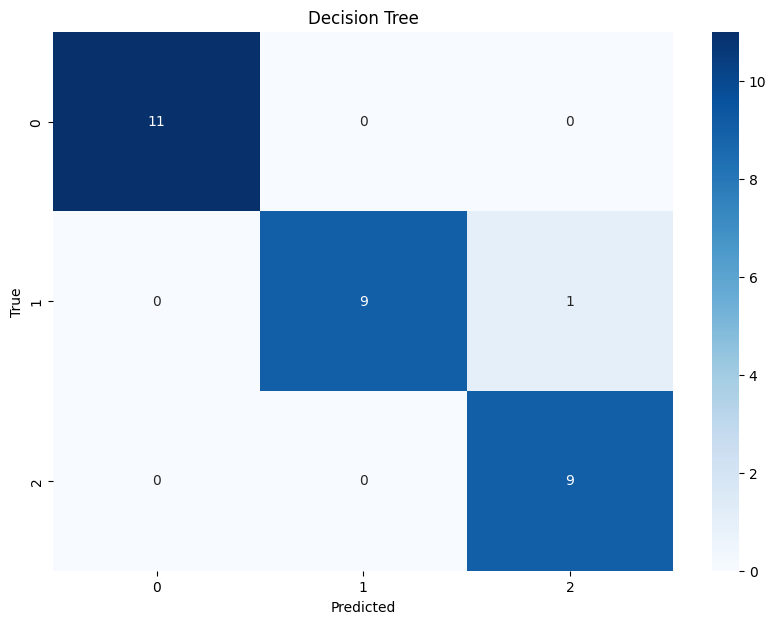

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Accuracy for Decision Tree: 96.67%

Precision for class 0: 1.00
Precision for class 1: 1.00
Precision for class 2: 0.90


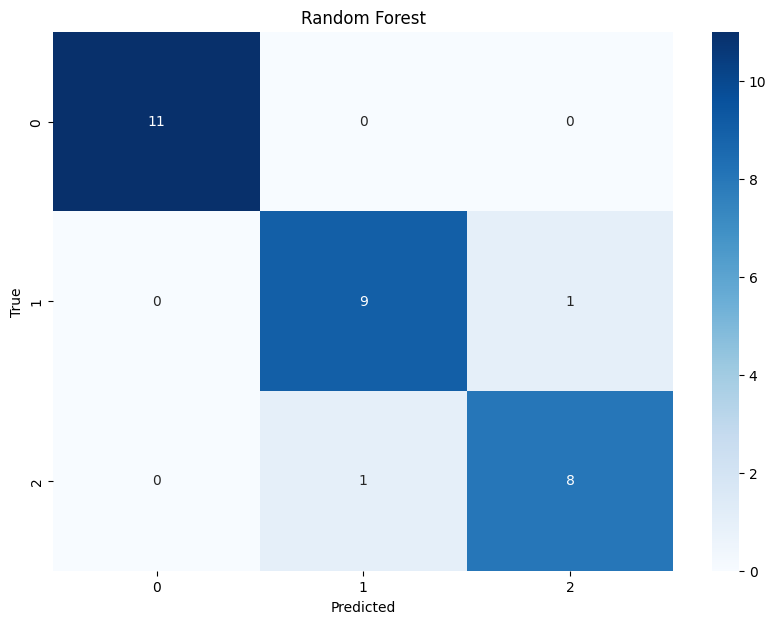

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Accuracy for Random Forest: 93.33%

Precision for class 0: 1.00
Precision for class 1: 0.90
Precision for class 2: 0.89


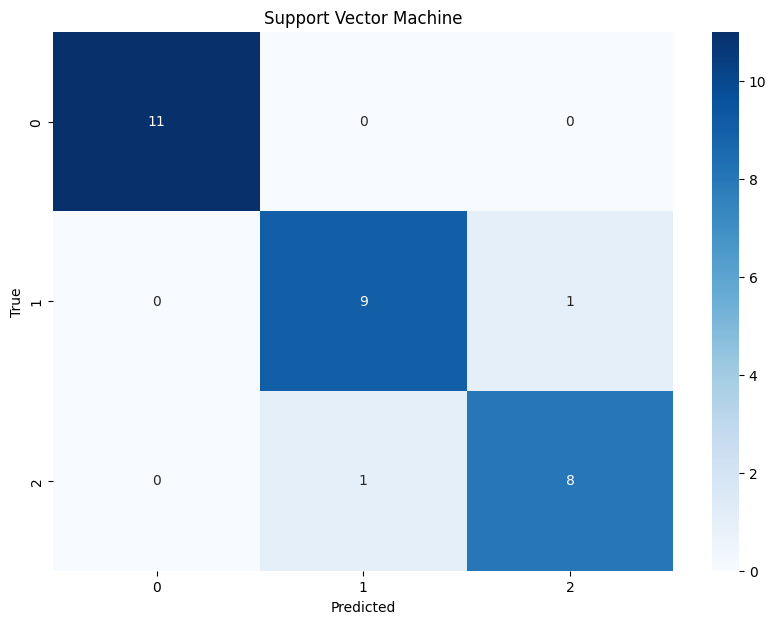

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Accuracy for Support Vector Machine: 93.33%

Precision for class 0: 1.00
Precision for class 1: 0.90
Precision for class 2: 0.89


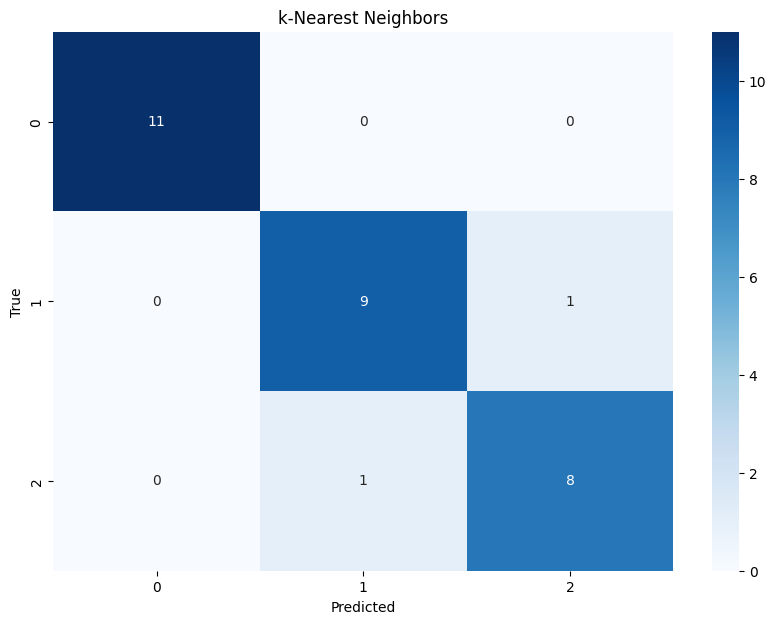

Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Accuracy for k-Nearest Neighbors: 93.33%

Precision for class 0: 1.00
Precision for class 1: 0.90
Precision for class 2: 0.89

Overall Results:
Logistic Regression: Accuracy=93.33%, Precision=['1.00', '0.90', '0.89']
Decision Tree: Accuracy=96.67%, Precision=['1.00', '1.00', '0.90']
Random Forest: Accuracy=93.33%, Precision=['1.00', '0.90', '0.89']
Support Vector Machine: Accuracy=93.33%, Precision=['1.00', '0.90', '0.89']
k-Nearest Neighbors: Accuracy=93.33%, Precision=['1.00', '0.90', '0.89']


In [30]:
# Initialize results dictionary
results = {'Classifier': [], 'Accuracy': [], 'Precision': []}

# Function to plot confusion matrix heatmap and classification report
def evaluate_model(clf, X_train, y_train, X_test, y_test, title):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Print classification report
    print(f"Classification Report for {title}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {title}: {accuracy*100:.2f}%\n")
    
    # Calculate precision for each class and print
    precision = precision_score(y_test, y_pred, average=None)
    for i in range(len(precision)):
        print(f"Precision for class {i}: {precision[i]:.2f}")
    
    # Save results
    results['Classifier'].append(title)
    results['Accuracy'].append(f"{accuracy*100:.2f}")
    results['Precision'].append([f"{p:.2f}" for p in precision])

# List of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=200)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC()),
    ("k-Nearest Neighbors", KNeighborsClassifier())
]

# Evaluate each classifier
for title, clf in classifiers:
    evaluate_model(clf, X_train, y_train, X_test, y_test, title)

# Print overall results
print("\nOverall Results:")
for i in range(len(results['Classifier'])):
    print(f"{results['Classifier'][i]}: Accuracy={results['Accuracy'][i]}%, Precision={results['Precision'][i]}")

### Let's try to improve the accuracy

In [37]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

# Grid search for Random Forest
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and accuracy for Random Forest
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Best Parameters for Random Forest: {best_params_rf}')
print(f'Random Forest Accuracy: {accuracy_rf}')

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.9666666666666667


## The accuracy of Random Forest increased from 93.33% to 96.67%.

In [38]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
y = df['Species'].values

In [33]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [35]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : ',accuracy)

Accuracy :  0.9666666666666667


## The accuracy of KNN increased from 93.33% to 96.66%.